# 2nd/3rd Principal Component Analyses and 3D Scatterplot (kidney)

Here we will again explore the DrugMatrix data using dimensionality reduction and cluster analysis. However, because the first two principal components did not yield noticeable clusters on a 2 dimensional space, we will now use the 2nd and 3rd components as well as 3 dimensional plotting of the top 3 components in hopes to see visible variation among the data. 

### Principal Component Analysis

PCA reduces dimensionality by finding principal components. These are directions  of maximum variation in a dataset. This will allow us to reduce a dataset's original features to a set of new ones based on the principal components. In this way, we end up with the least amount of features that keep the maximum amount of variation about how the data is distributed.

## Preparing data 

Here we import the DrugMatrix (kidney) CSV file of drugs and genes from the google drive folder as a dataframe entitled: 'DM_kidney1'

We will use the kidney df to create and explore PCA plots (using only the annotated (23,748) genes in DM's database.

In [10]:
import pandas as pd

#Original kidney df
DM_kidney = pd.read_table('C:\Users\Troy\Desktop\kidney.txt', sep='\t')

#DM_kidney2
DM_kidney2 = DM_kidney.dropna(subset=['Gene'])
DM_kidney2.columns.names = ['Drugs']
DM_kidney2 = DM_kidney2.set_index('Gene')
del DM_kidney2['Unnamed: 0']
DM_kidney2.head(15) #show top 15 genes

Drugs,MLN-518,GEFITINIB,BACITRACIN,INDOMETHACIN,INDOMETHACIN.1,CATECHOL,NETILMICIN,BETA-ESTRADIOL,BETA-ESTRADIOL.1,ACETAMINOPHEN,...,PHENACETIN.2,GEFITINIB.5,LIPOPOLYSACCHARIDE E. COLI O55:B5.2,LOVASTATIN.4,DIETHYLSTILBESTROL.3,ATORVASTATIN.3,ZOMEPIRAC,BENZOTHIAZYL DISULFIDE,BENZOTHIAZYL DISULFIDE.1,BENZOTHIAZYL DISULFIDE.2
Gene,,,,,,,,,,,,,,,,,,,,,
Sumo2,0.010,0.035,-0.054,0.008,0.015,-0.028,-0.004,0.019,0.018,0.017,...,0.016,0.019,0.021,-0.008,0.012,0.017,0.025,-0.079,-0.017,-0.053
Cdc37,-0.036,-0.035,-0.107,-0.002,-0.015,-0.003,0.029,-0.042,-0.039,0.013,...,-0.016,-0.024,0.006,0.011,0.034,0.051,0.002,-0.097,-0.033,-0.092
Copb2,-0.065,-0.045,-0.082,0.011,0.015,-0.013,0.080,0.030,-0.008,0.059,...,0.039,-0.049,0.045,0.040,-0.017,0.020,0.075,-0.086,0.012,0.007
Vcp,-0.044,-0.015,-0.074,0.005,-0.001,-0.020,0.022,0.061,0.061,0.047,...,0.079,-0.017,0.001,0.016,0.037,0.051,0.029,-0.036,-0.025,-0.042
Ube2d2,-0.012,0.033,-0.025,0.019,0.003,-0.046,0.045,0.065,0.042,0.032,...,0.031,-0.014,0.003,0.016,0.046,0.053,0.021,-0.031,-0.009,-0.034
Becn1,0.052,0.074,-0.049,0.040,-0.002,-0.026,0.051,0.006,-0.040,0.043,...,0.072,0.086,-0.033,0.025,0.013,0.031,0.013,-0.031,-0.002,-0.001
Lypla2,-0.067,-0.055,-0.041,0.011,-0.010,-0.071,0.090,0.007,-0.021,0.012,...,0.020,-0.057,-0.004,0.031,-0.040,-0.015,0.000,-0.080,-0.014,-0.048
Arf1,-0.027,-0.009,-0.067,-0.018,-0.019,-0.008,0.054,0.035,0.039,0.028,...,0.019,-0.025,0.020,0.001,0.042,0.030,0.026,-0.064,-0.025,-0.035
Gdi2,-0.014,0.009,-0.098,0.043,-0.012,0.004,0.020,0.017,0.011,0.040,...,0.028,-0.011,0.027,-0.008,0.035,0.043,0.049,-0.085,-0.016,-0.024


In [4]:
print len(DM_kidney2.index) -2, "Genes" 
print len(DM_kidney2.columns) -1, "Drugs"

23748 Genes
364 Drugs


We specified index_col to be 0 in order to make the drug names the row labels. We used the '\t' separator because our csv is actually tab-delimited (not comma). The head() function shows the first 5 lines (by defalult) to ensure our output is correct.

## Interactive 3D plot (Top 3 PCs)

In [9]:
import plotly.plotly as py
py.sign_in('troypgoff', '2AWnQIHTKdriCuI6TdCp')
fig = py.get_figure("https://plot.ly/~TroyPgoff/32/")
py.iplot(fig)

[Link to 3Dplot](https://plot.ly/~TroyPgoff/54)

## Dimensionality Reduction

Ideally at this point we want to represent each drug in a two dimensional space. This dataset has each sample as a drug defined by 41 different variables - each corresponding to a distinct drug (or drug dosage).  

Python's Sci-kit machine learning library comes with PCA implementation

Here we transformed our data into a lower representation and put it into a new dataframe: 'DM_kidney2_2d'

We also can check the explained variance ratio as shown below.

In [5]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=3)
pca2.fit(DM_kidney2)

DM_2d2 = pca2.transform(DM_kidney2)

DM_kidney2_2d = pd.DataFrame(DM_2d2)
DM_kidney2_2d.index = DM_kidney2.index
DM_kidney2_2d.columns = ['PC1','PC2','PC3']
DM_kidney2_2d.head(10)
#DM_kidney2_2d.to_csv('C:\Users\Troy\Desktop\DM_kidneytsne.txt')

,PC1,PC2,PC3
Gene,,,
Sumo2,0.360020,0.015499,0.235528
Cdc37,0.096920,0.180971,0.274966
Copb2,0.264387,-0.181745,0.322145
Vcp,0.486860,-0.250120,0.140967
Ube2d2,0.316450,-0.210956,0.130456
Becn1,0.485552,-0.051791,0.244083
Lypla2,0.278637,0.062285,0.203556
Arf1,0.236272,-0.173322,0.148818
Gdi2,0.073510,-0.261449,0.290550


In [6]:
print(pca2.explained_variance_ratio_)

[ 0.08397944  0.0528219   0.04146376]


## Plotting the data (PC1&2)

Here all we have to do is to call plot on the dataframe. We can add annotation loops that tag every point with it's drug name.

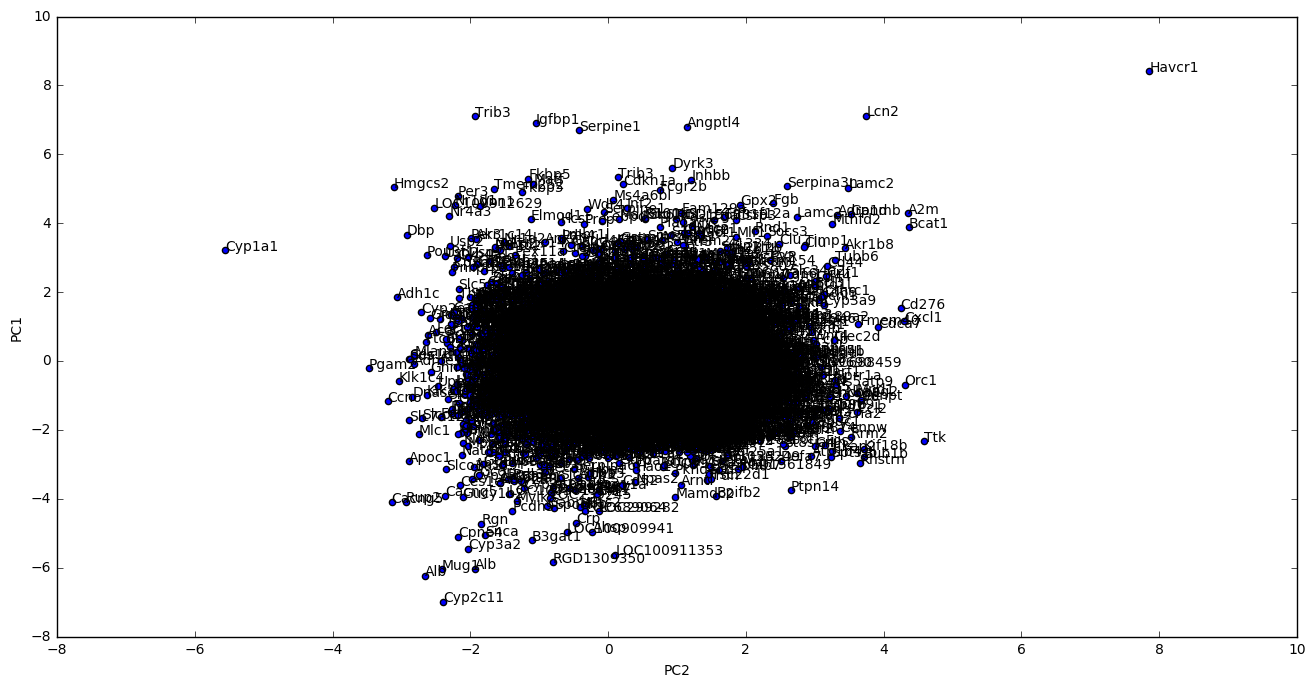

In [7]:
%matplotlib inline

ax = DM_kidney2_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, Drug in enumerate(DM_kidney2.index):
    ax.annotate(Drug, (DM_kidney2_2d.iloc[i].PC2, DM_kidney2_2d.iloc[i].PC1))

## Plotting the data (PC2&3)

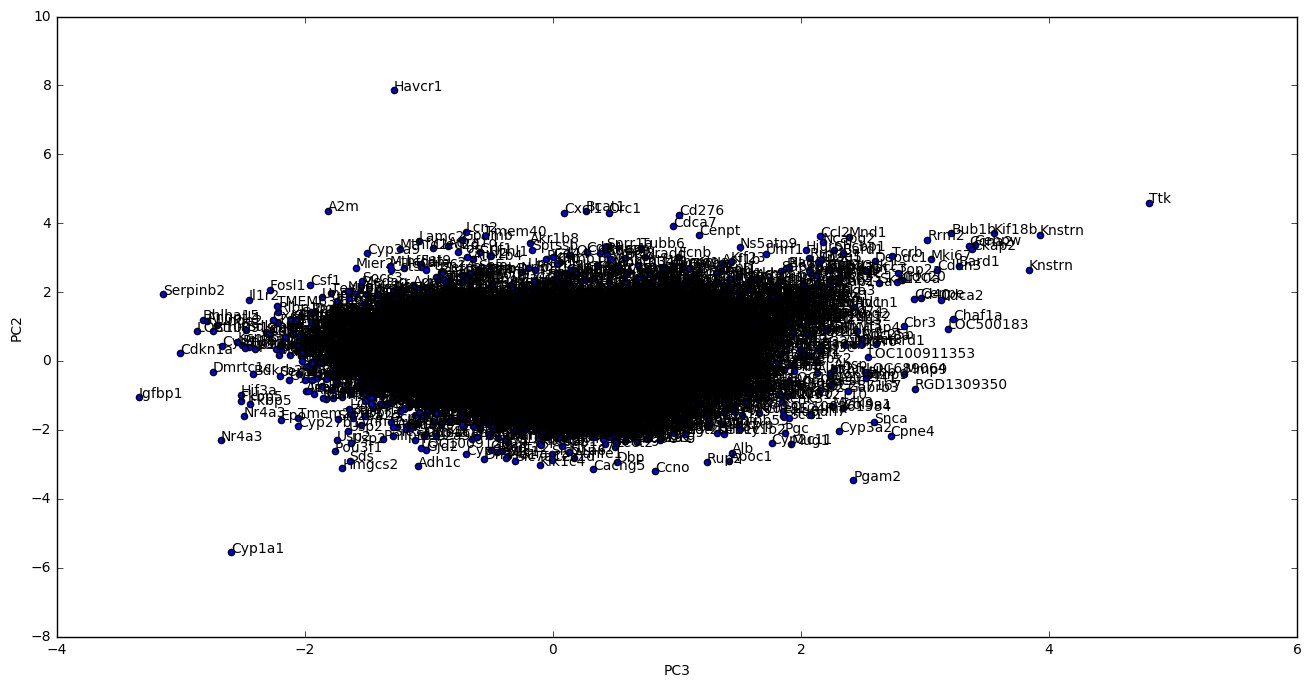

In [8]:
%matplotlib inline

ax = DM_kidney2_2d.plot(kind='scatter', x='PC3', y='PC2', figsize=(16,8))

for i, Drug in enumerate(DM_kidney2.index):
    ax.annotate(Drug, (DM_kidney2_2d.iloc[i].PC3, DM_kidney2_2d.iloc[i].PC2))